# Coarse-graining NARVAL Data 
**For Figure 1 of the paper**

In [1]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import importlib
import matplotlib
import matplotlib.pyplot as plt

# For psyplot
import psyplot.project as psy
import matplotlib as mpl
# %matplotlib inline
# %config InlineBackend.close_figures = False

psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [10., 8.]

In [2]:
path = '/home/b/b309170/my_work/NARVAL/'
file_cg = 'for_paraview/clc_R02B04_NARVALII_2016072800_cloud_DOM01_0017_boxed_scaled.nc'
file_orig = 'for_paraview/dei4_NARVALII_2016072800_cloud_DOM01_ML_0017_clc_scaled.nc'

#### Question 1: Does the coarse-graining look right?

Of horizontal coarse-graining (psyplot): <br>

If you get the error 'ValueError: Can only plot 2-dimensional data!', then you need to use cdo setgrid on the file first.

In [14]:
plt.rcParams['axes.titlesize'] = 30

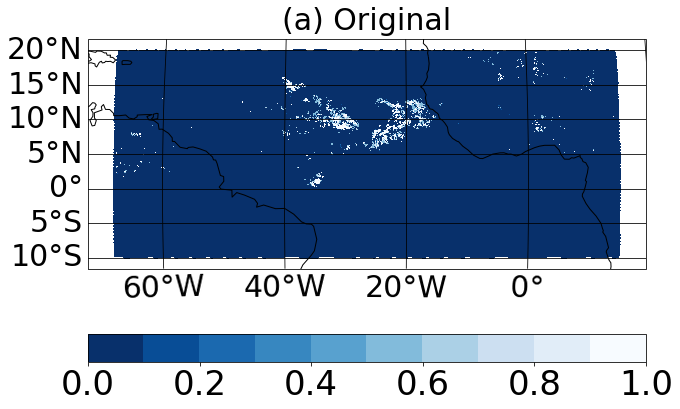

In [20]:
# # Note that the cloud cover scheme used was a 0-1 cloud cover scheme.
# maps = psy.plot.mapplot(os.path.join(path, file_orig), dims = {'name': 'ccl', 'height': 40}, 
#                         projection='robin', cmap='Blues_r', title='Cloud cover on 20041105 at 15:00 (on layer 40)')
# plt.savefig('original_cloud_cover_snapshot.pdf')

# Note that the cloud cover scheme used was a 0-1 cloud cover scheme.
maps = psy.plot.mapplot(os.path.join(path, file_orig), dims = {'name': 'clc', 'height': 40}, cticksize=34, grid_labelsize=30,
                        projection='robin', cmap='Blues_r', xgrid=True, ygrid=True)
plt.title('(a) Original')
plt.savefig('original_cloud_cover_snapshot_untitled_narval.pdf')

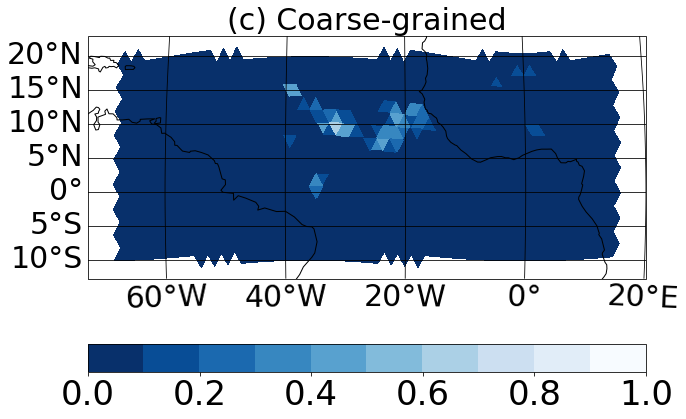

In [21]:
# I had to cdo sellonlatbox first. Zooming in via lonlatbox in maps update did not work!

maps = psy.plot.mapplot(os.path.join(path, file_cg), dims = {'name': 'clc', 'height': 40}, cticksize=34, grid_labelsize=30,
                        projection='robin', cmap='Blues_r', bounds=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        xgrid=True, ygrid=True)
# maps.update(lonlatbox=[-68, 15, -10, 20]) #[lon.min(), lon.max(), lat.min(), lat.max()]
# maps.update(lonlatbox=[-180, 180, -90, 90])
plt.title('(c) Coarse-grained')
plt.savefig('horizontally_coarse_grained_cloud_cover_untitled_narval.pdf')

# plt.savefig('test_2.pdf', bbox_inches=Bbox([[4, 4], [6, 6]]))

Of vertical coarse-graining:

In [38]:
## Load original data
# Load clc profile
DS = xr.open_dataset('/pf/b/b309170/my_work/NARVAL/data/clc/clc_R02B04_NARVALII_2016072800_cloud_DOM01_0017.nc')
da = DS.clc.values
print(da.shape)

# Extract all nan_fields
nan_fields = np.where(~np.isnan(da[0, -1, :]))[0]
# # Some arbitrary horizontal field
rand_field = np.random.randint(len(nan_fields))
rand_field = nan_fields[rand_field] 
# rand_field=10084 # To reconstruct the profile from the paper
print(rand_field)

cl_hr = da[0, :, rand_field]

# Load zg profile
DS = xr.open_dataset('/pf/b/b309170/my_work/NARVAL/data/z_ifc/zf_R02B04_NARVALI_fg_DOM01.nc')
da = DS.zf.values
zg_hr = da[:, rand_field]
# zg_hr = zg_hr[-91:] # Need the 91 earth-bound layers

(1, 75, 20480)
10084


In [39]:
## Load vertically coarse-grained data
# Load clc profile
DS = xr.open_dataset('/pf/b/b309170/my_work/NARVAL/data_var_vertinterp/clc/int_var_clc_R02B04_NARVALII_2016072800_cloud_DOM01_0017.nc')
da = DS.clc.values
not_nan = ~np.isnan(da[0,:,rand_field])
cl_lr = da[0, not_nan, rand_field]
# Load zg profile
DS = xr.open_dataset('/pf/b/b309170/my_work/NARVAL/data_var_vertinterp/zg/zg_icon-a_capped.nc')
da = DS.zg.values
zg_lr = da[not_nan, rand_field] 

In [44]:
# Increase the general font size
size_plot_elements = 16
matplotlib.rcParams['legend.fontsize'] = size_plot_elements
matplotlib.rcParams['axes.labelsize'] = size_plot_elements # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = size_plot_elements
matplotlib.rcParams['ytick.labelsize'] = size_plot_elements

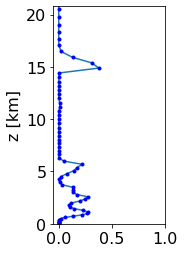

In [51]:
fig = plt.figure(figsize=(2,4))

# # Units in kilometers
# zg_hr = zg_hr/1000
# zg_lr = zg_lr/1000

# ax = fig.add_subplot(211, title='High-res vertical cloud cover profile', ylim=(0, np.max(zg_lr)), xlim=(-0.05,1),
#                     xlabel='Cloud Cover Fraction', ylabel='Mean height of a vertical layer in km')
ax = fig.add_subplot(111, ylim=(0, np.max(zg_lr[4:])), xlim=(-0.05,1), ylabel='z [km]', xticks=[0,0.5,1])
ax.plot(cl_hr/100, zg_hr)
ax.plot(cl_hr/100, zg_hr, 'b.')

plt.savefig('vertical_coarse-graining_narval_example_v2_1.pdf', bbox_inches='tight')

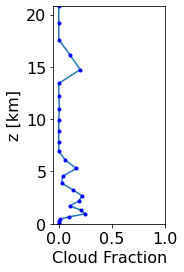

In [55]:
fig = plt.figure(figsize=(2,4))

# ax_2 = fig.add_subplot(212, title='Low-res vertical cloud cover profile', ylim=(0, np.max(zg_lr)), xlim=(-0.05,1),
#                       xlabel='Cloud Cover Fraction', ylabel='Mean height of a vertical layer in km')
ax_2 = fig.add_subplot(111, ylim=(0, np.max(zg_lr[4:])), xlim=(-0.05,1),
                      xlabel='Cloud Fraction', ylabel='z [km]', xticks=[0,0.5,1])
ax_2.plot(cl_lr/100, zg_lr)
ax_2.plot(cl_lr/100, zg_lr, 'b.')

plt.savefig('vertical_coarse-graining_narval_example_v2_2.pdf', bbox_inches='tight')

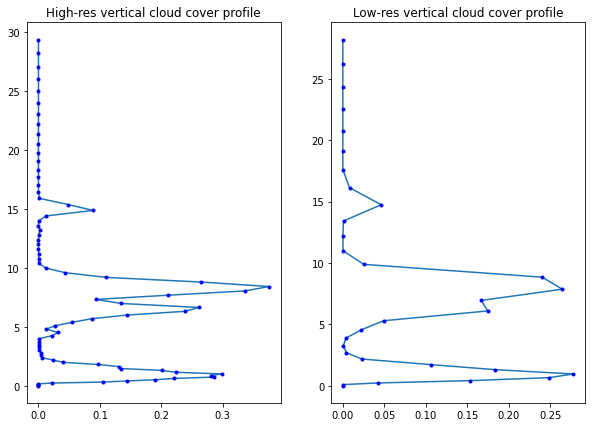

In [63]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(121, title='High-res vertical cloud cover profile')
ax.plot(cl_hr/100, zg_hr)
ax.plot(cl_hr/100, zg_hr, 'b.')

ax_2 = fig.add_subplot(122, title='Low-res vertical cloud cover profile')
ax_2.plot(cl_lr/100, zg_lr)
ax_2.plot(cl_lr/100, zg_lr, 'b.')